In [2]:
%matplotlib notebook
import numpy as np
data = np.array([
    [9,0.5],
    [10,9.36],
    [11,52],
    [12,191],
    [13,350.19],
    [14,571],
    [15,912.17],
    [16,1207],
    [17,1682],
    [18,2135]
])

<IPython.core.display.Javascript object>


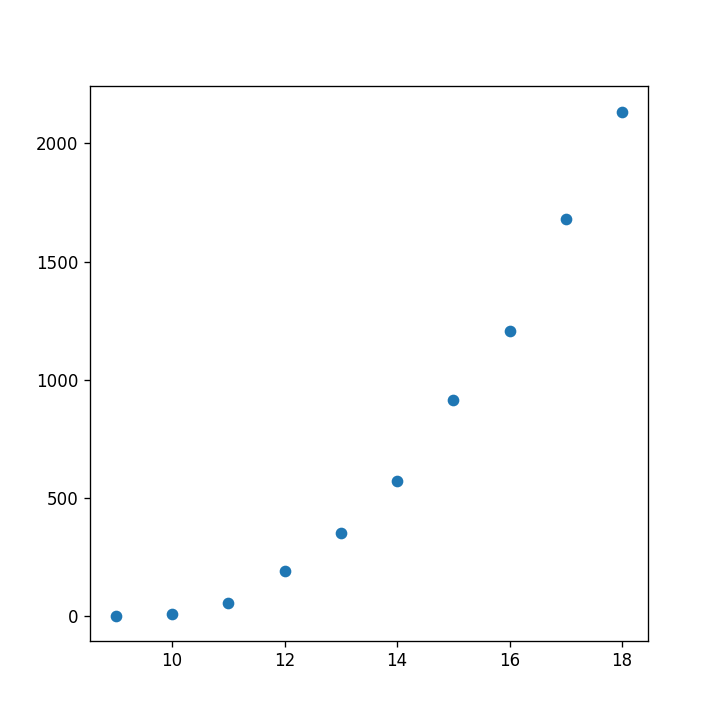

In [3]:
x = data[:,0]
actual = data[:,1]
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=80)
plt.scatter(x,actual)
plt.show()

## 三次函数的方程

$y = m_1*x^3 + m_2*x^2 + m_3*x + b$

求解目标：$m_1,m_2,m_3,b$

# 梯度下降，找到最好的m_1,m_2,m_3和b的值

## 梯度下降步骤¶
1.随机选取一个b值  
2.计算这个b值对应的mse的斜率  
3.如果mse的斜率非常大，那要根据mse的斜率，去修改b的值  
4.根据m1,m2,m3,b的偏导情况，决定他们的变化方向  
mse值越大，b的修改值越大，mse斜率为正，b需要减少，mse斜率为负，b需要增加  
5.选取一个很小的值，叫learningrate，学习速率，可以理解为迈开的步伐  
6.用learningrate和mse的信号去更新b的值  
7.重复2-6的步骤，直到mse的斜率接近于0  

In [4]:
from sympy import *

In [5]:
# 声明变量和常量
x = data[:,0]
actual = data[:,1]
np.set_printoptions(suppress=True)
from sympy import *  #导入计算库
m_1, m_2,m_3, b = symbols('m_1, m_2, m_3, b') #声明变量x,y,z
init_printing(pretty_print=True) #初始化latex显示

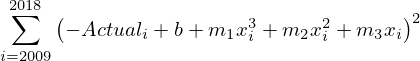

In [6]:
from sympy import *  #导入计算库
x_i,Actual_i,i= symbols('x_i,Actual_i,i') #声明变量x,y,z
init_printing(pretty_print=True) #初始化latex显示
expr = Sum((m_1*x_i**3 + m_2*x_i**2+m_3*x_i + b-Actual_i)**2, (i, 2009, 2018))

expr

## 分别计算偏导
$m_1,m_2,m_3,b$对$mse$总体的影响

In [13]:
expand(diff(expr,m_1))

In [8]:
expand(diff(expr,m_2))

In [9]:
expand(diff(expr,m_3))

In [10]:
expand(diff(expr,b))

# 采用求解法获取m1，m2，m3，b的值

In [11]:
np.set_printoptions(suppress=True)
actual

array([    0.5 ,     9.36,    52.  ,   191.  ,   350.19,   571.  ,
         912.17,  1207.  ,  1682.  ,  2135.  ])

In [12]:
sum1 = 0
sum2 = 0
sum3 = 0
sum4 = 0
for index,item in enumerate(actual):
    sum1 = sum1 -(item*x[index]**3) +b*(x[index]**3)+ m_1*(x[index]**6)+ m_2*(x[index]**5)+m_3*(x[index]**4)
    sum2 = sum2 -(item*x[index]**2) +b*(x[index]**2)+ m_1*(x[index]**5)+ m_2*(x[index]**4)+m_3*(x[index]**3)
    sum3 = sum3 -(item*x[index]) + b*x[index] + m_1*(x[index]**4)+m_2*(x[index]**3)+m_3*(x[index]**2)
    sum4 = sum4 -(item) + b + m_1*(x[index]**3)+m_2*(x[index]**2)+m_3*(x[index])

print(sum1)
print(sum2)
print(sum3)
print(sum4)
result = solve([sum1,sum2,sum3,sum4],[m_1,m_2,m_3,b])

27945.0*b + 104962965.0*m_1 + 6595425.0*m_2 + 423573.0*m_3 - 31482607.68
1905.0*b + 6595425.0*m_1 + 423573.0*m_2 + 27945.0*m_3 - 1897938.86
135.0*b + 423573.0*m_1 + 27945.0*m_2 + 1905.0*m_3 - 115527.12
10*b + 27945.0*m_1 + 1905.0*m_2 + 135.0*m_3 - 7110.22


In [12]:
result

# 表示出来天猫销售额的回归方程

In [15]:
x,y = symbols('x,y ') #声明变量x,y,z
y = m_1*x**3 + m_2*x**2 +m_3*x+ b
y

# 用方程进行预测

In [16]:
y.subs([(x,19),(m_1,result[m_1]),(m_2,result[m_2]),(m_3,result[m_3]),(b,result[b])])#数据代入函数

<IPython.core.display.Javascript object>


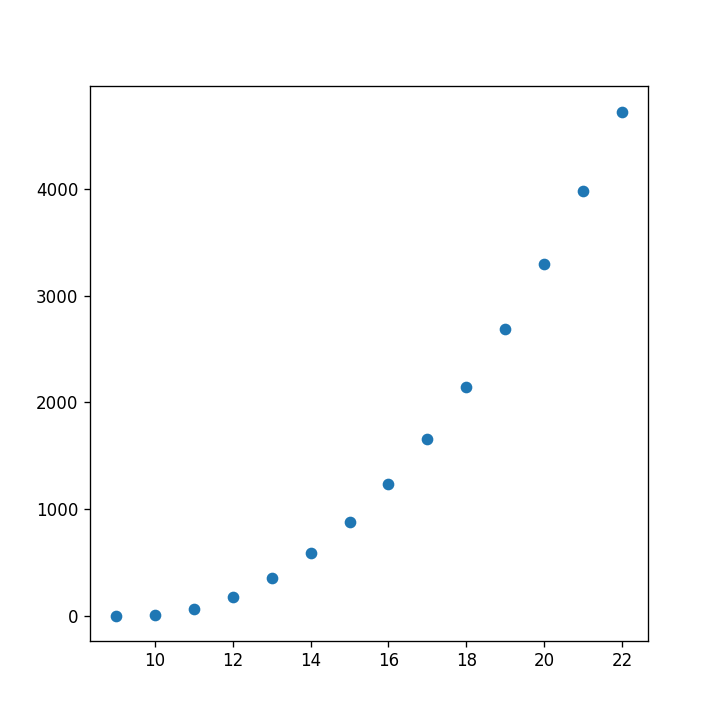

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook  
fig = plt.figure(figsize=(6, 6), dpi=80)
XX = np.linspace(9,22,14)
YY = np.power(XX,3)*result[m_1] + np.power(XX,2)*result[m_2] +np.power(XX,1)*result[m_3]+ result[b]  
plt.scatter(XX,YY)
plt.show()